# BIRD SPECIES CLASSIFICATION with DEEP LEARNING

<p style="text-align:center;"><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR-zuTVRKn8MQ4ZiHcK-WU1QoCzoYw_V7Yh9g&usqp=CAU" alt="Girl in a jacket" width="500" height="600" class="center"></p>

**Project Overview**

It is a project that uses transfer learning to predict 450 classes belonging to bird species. Data set of 400 bird species.58388 training images, 2000 test images(5 images per species) and 2000 validation images(5 images per species. This is a very high quality dataset where there is only one bird in each image and the bird typically takes up at least 50% of the pixels in the image. As a result even a moderatly complex model will achieve training and test accuracies in the mid 90% range.

To become one with data is significant in such projects. Therefore, visualization techniques are usually applied in the project. A pre-trained model of Keras (InceptionV3) is  used in the project. After reachin nearly %89 accuracy, fine-tuning is applied and the accuracy is improved to **%94**.

Steps followed during the development of the project:

* 1. Become One with Data
* 2. Data Preprocessing
* 3. Create a and fit the Model (Using InceptionV3 pre-trained model)
* 4. Freeze top layers of Base Model
* 5. Fine-tuning and Refitting 




## 1. Become one with the data

In [1]:
import os 

#walk through the directory and list the numbers of files
for dirpath, dirnames, filenames in os.walk("/kaggle/input/100-bird-species"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 4 directories and 3 images in /kaggle/input/100-bird-species
There are 450 directories and 0 images in /kaggle/input/100-bird-species/valid
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/DALMATIAN PELICAN
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/WATTLED CURASSOW
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/AMERICAN WIGEON
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/CARMINE BEE-EATER
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/GAMBELS QUAIL
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/UMBRELLA BIRD
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/AMERICAN KESTREL
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/AMERICAN GOLDFINCH
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/DUSKY LORY
There are 0 d

##### How many classes do we have?

In [2]:
num_of_bird_groups = len(os.listdir("/kaggle/input/100-bird-species/train"))
num_of_bird_groups

450

##### What are the class names?

In [3]:
import pathlib 
import numpy as np

data_dir = pathlib.Path("/kaggle/input/100-bird-species/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of class names from subdirectory 
print(class_names)

['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABYSSINIAN GROUND HORNBILL'
 'AFRICAN CROWNED CRANE' 'AFRICAN EMERALD CUCKOO' 'AFRICAN FIREFINCH'
 'AFRICAN OYSTER CATCHER' 'AFRICAN PIED HORNBILL' 'ALBATROSS'
 'ALBERTS TOWHEE' 'ALEXANDRINE PARAKEET' 'ALPINE CHOUGH'
 'ALTAMIRA YELLOWTHROAT' 'AMERICAN AVOCET' 'AMERICAN BITTERN'
 'AMERICAN COOT' 'AMERICAN FLAMINGO' 'AMERICAN GOLDFINCH'
 'AMERICAN KESTREL' 'AMERICAN PIPIT' 'AMERICAN REDSTART' 'AMERICAN WIGEON'
 'AMETHYST WOODSTAR' 'ANDEAN GOOSE' 'ANDEAN LAPWING' 'ANDEAN SISKIN'
 'ANHINGA' 'ANIANIAU' 'ANNAS HUMMINGBIRD' 'ANTBIRD' 'ANTILLEAN EUPHONIA'
 'APAPANE' 'APOSTLEBIRD' 'ARARIPE MANAKIN' 'ASHY STORM PETREL'
 'ASHY THRUSHBIRD' 'ASIAN CRESTED IBIS' 'ASIAN DOLLARD BIRD'
 'AUCKLAND SHAQ' 'AUSTRAL CANASTERO' 'AUSTRALASIAN FIGBIRD' 'AVADAVAT'
 'AZARAS SPINETAIL' 'AZURE BREASTED PITTA' 'AZURE JAY' 'AZURE TANAGER'
 'AZURE TIT' 'BAIKAL TEAL' 'BALD EAGLE' 'BALD IBIS' 'BALI STARLING'
 'BALTIMORE ORIOLE' 'BANANAQUIT' 'BAND TAILED GUAN' 'BANDED BROADBILL'
 'BAN

##### A function to visualize images randomly

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setting up the image directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Image shape: (224, 224, 3)


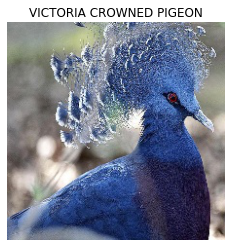

In [5]:
img = view_random_image(target_dir = "/kaggle/input/100-bird-species/train/",
                        target_class = "VICTORIA CROWNED PIGEON") # or we can write nike instead of converse to see converse examples

In [6]:
import tensorflow as tf
img.shape #(width, height, colour channels)

(224, 224, 3)

##### More visualization :D

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


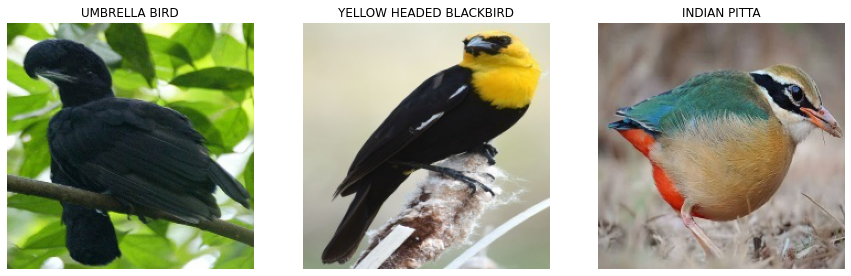

In [7]:
plt.figure(figsize = (15,7))
plt.subplot(1,3,1)
steak_image = view_random_image("/kaggle/input/100-bird-species/train/", "UMBRELLA BIRD")
plt.subplot(1,3,2)
pizza_image = view_random_image("/kaggle/input/100-bird-species/train/", "YELLOW HEADED BLACKBIRD")
plt.subplot(1,3,3)
pizza_image = view_random_image("/kaggle/input/100-bird-species/train/", "INDIAN PITTA")

## 2. Data Preprocessing

In [8]:
import matplotlib.pyplot as plt
import pathlib, os, random
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow as tf

from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [9]:
train_dir = "/kaggle/input/100-bird-species/train/"
test_dir = "/kaggle/input/100-bird-species/test/"
val_dir = "/kaggle/input/100-bird-species/valid/"

In [10]:
# Rescale
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 64,
                                               target_size= (224,224),
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 64,
                                               target_size = (224,224),
                                               class_mode = "categorical")

val_data = valid_datagen.flow_from_directory(directory = val_dir,
                                               batch_size = 64,
                                               target_size = (224,224),
                                               class_mode = "categorical")


Found 70626 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.


## 3.Creating and fitting the Model

In [11]:
# 1. Create a base model with tf.keras.applications

base_model = tf.keras.applications.InceptionV3(include_top= False,)

# 2. Freeze the base model
base_model.trainable = False

#3. Create inputs into models
inputs = tf.keras.layers.Input(shape =(300,300,3), name = "input-layer")

#4. Rescaling
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

#5. Pass the inputs 
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#7. Create the output activation layer
outputs = tf.keras.layers.Dense(450, activation = "softmax", name = "output-layer")(x)

# 8. Combine the inputs with outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
                metrics = ["accuracy"])


history = model_0.fit(train_data,
                                 epochs=5,
                                 steps_per_epoch = len(train_data),
                                 validation_data = val_data,
                                 validation_steps = int(0.25*len(val_data)),)

2022-12-15 14:23:48.204681: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 14:23:48.340649: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 14:23:48.341568: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-15 14:23:48.343598: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

87924736/87910968 [==============================] - 0s 0us/step
Shape after passing inputs through base model: (None, 8, 8, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)


2022-12-15 14:23:54.886016: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-12-15 14:24:00.773466: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1104/1104 [==============================] - 548s 486ms/step - loss: 6.1225 - accuracy: 0.0081 - val_loss: 5.7939 - val_accuracy: 0.0295
Epoch 2/5
1104/1104 [==============================] - 269s 244ms/step - loss: 5.5892 - accuracy: 0.0494 - val_loss: 5.3351 - val_accuracy: 0.0851
Epoch 3/5
1104/1104 [==============================] - 275s 249ms/step - loss: 5.1664 - accuracy: 0.1139 - val_loss: 4.9757 - val_accuracy: 0.1476
Epoch 4/5
1104/1104 [==============================] - 267s 241ms/step - loss: 4.7914 - accuracy: 0.1712 - val_loss: 4.6284 - val_accuracy: 0.1806
Epoch 5/5
1104/1104 [==============================] - 272s 247ms/step - loss: 4.4601 - accuracy: 0.2215 - val_loss: 4.2413 - val_accuracy: 0.2708


In [12]:
model_0.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input-layer (InputLayer)     [(None, 300, 300, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, None, None, 2048)  21802784  
_________________________________________________________________
global_average_pooling_layer (None, 2048)              0         
_________________________________________________________________
output-layer (Dense)         (None, 450)               922050    
Total params: 22,724,834
Trainable params: 922,050
Non-trainable params: 21,802,784
_________________________________________________________________


In [13]:
model_0.evaluate(test_data)

36/36 [==============================] - 18s 496ms/step - loss: 4.2495 - accuracy: 0.2573


[4.24945592880249, 0.25733333826065063]

In [14]:
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure() 
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

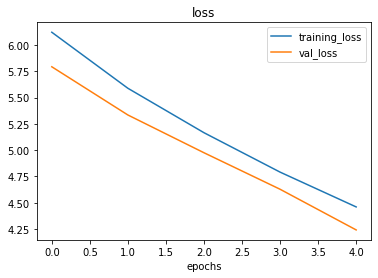

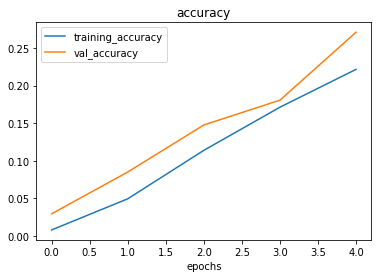

In [15]:
plot_loss_curves(history)

## 4. Freeze top layers of Base Model

In [16]:
# To begin fine-tuning lets start by setting the last 10 layers as trainable

base_model.trainable = True

# Un-freeze last 10 layers
for layer in base_model.layers[:-5]:
  layer.trainable = False

# Recompile (we have to compile model every time there is a change)
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001), # when fine-tuning you typically want to lower lr by 10x
                 metrics = ["accuracy"] )

In [17]:
# Check which layers are trainable
for layer_number, layer in enumerate(model_0.layers[1].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 conv2d False
2 batch_normalization False
3 activation False
4 conv2d_1 False
5 batch_normalization_1 False
6 activation_1 False
7 conv2d_2 False
8 batch_normalization_2 False
9 activation_2 False
10 max_pooling2d False
11 conv2d_3 False
12 batch_normalization_3 False
13 activation_3 False
14 conv2d_4 False
15 batch_normalization_4 False
16 activation_4 False
17 max_pooling2d_1 False
18 conv2d_8 False
19 batch_normalization_8 False
20 activation_8 False
21 conv2d_6 False
22 conv2d_9 False
23 batch_normalization_6 False
24 batch_normalization_9 False
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_5 False
29 conv2d_7 False
30 conv2d_10 False
31 conv2d_11 False
32 batch_normalization_5 False
33 batch_normalization_7 False
34 batch_normalization_10 False
35 batch_normalization_11 False
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
40 mixed0 False
41 conv2d_15 False
42 batch_normalization_15 False

In [18]:
# Now we have unfrozen some of the layers on the top 
print(len(model_0.trainable_variables))

2


In [19]:
model_0.save("64_sgd_0.001_6epoch.h5")

## 5. Fine-Tuning and Refitting

In [20]:
initial_epochs = 5
fine_tune_epochs = initial_epochs + 1

# Refit the model
history_2 = model_0.fit(train_data,
                       epochs = fine_tune_epochs,
                       validation_data = val_data,
                       validation_steps = int(0.25*len(val_data)),
                       initial_epoch =  history.epoch[-1],) # Start the epoch where it left before

Epoch 5/6
1104/1104 [==============================] - 265s 237ms/step - loss: 4.1716 - accuracy: 0.2681 - val_loss: 4.0247 - val_accuracy: 0.2847
Epoch 6/6
1104/1104 [==============================] - 274s 248ms/step - loss: 3.9216 - accuracy: 0.3110 - val_loss: 3.7573 - val_accuracy: 0.3646


In [21]:
model_0.evaluate(test_data)

36/36 [==============================] - 9s 249ms/step - loss: 3.7253 - accuracy: 0.3622


[3.725313901901245, 0.36222222447395325]

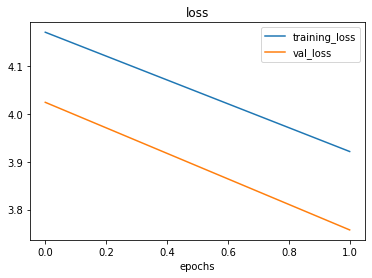

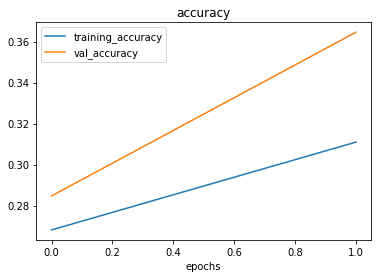

In [22]:
plot_loss_curves(history_2)

In [23]:
model_0.save("64_sgd_0.001_6epoch__.h5")

True Label: ABBOTTS BOOBY
Predicted Label: GLOSSY IBIS


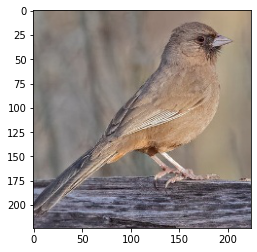

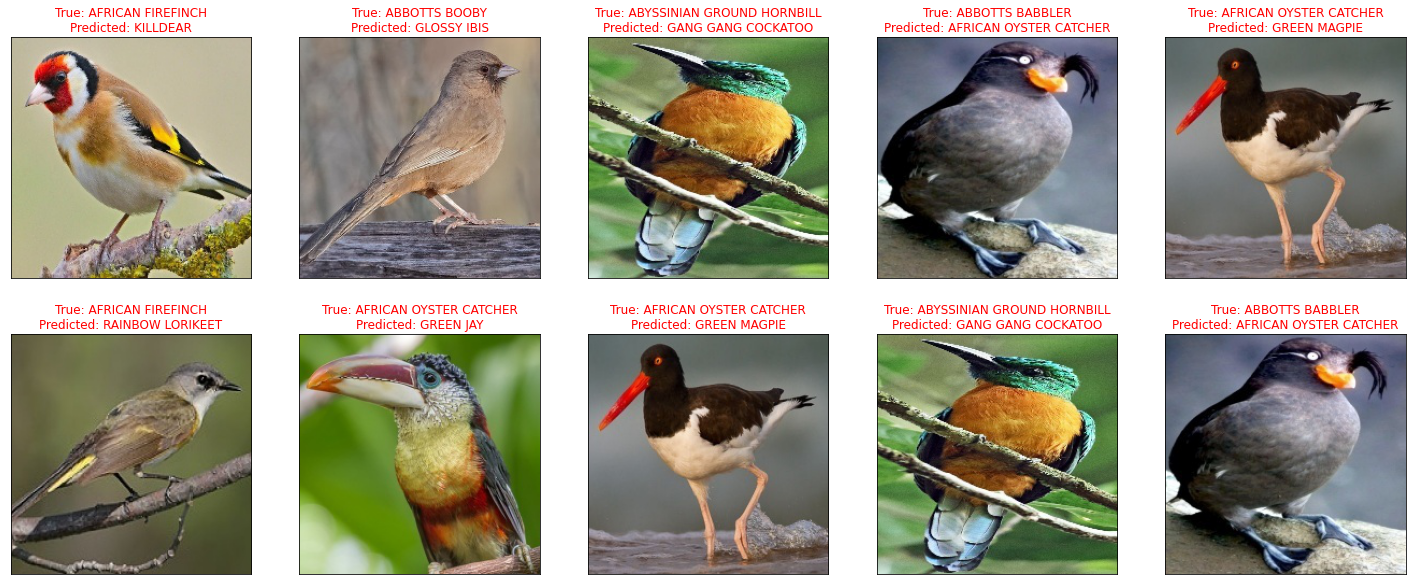

<Figure size 432x288 with 0 Axes>

In [24]:
pred = model_0.predict(test_data)
pred = np.argmax(pred,axis=1)

index =6

img , label = test_data[index]
label = test_data.labels[index]
print(f"True Label: {class_names[label]}")
print(f"Predicted Label: {class_names[pred[index]]}")  
plt.imshow(img[0])
plt.show()

# Display 10 random pictures from the dataset with their labels

random_index = np.random.randint(0, len(test_data) - 1, 10)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    randImg , randLabel = test_data[random_index[i]]
    randLabel = test_data.labels[random_index[i]]
    ax.imshow(randImg[0])
    if class_names[randLabel] == class_names[pred[random_index[i]]]:
      color = "green"
    else:
      color = "red"
    ax.set_title(f"True: {class_names[randLabel]}\nPredicted: {class_names[pred[random_index[i]]]}", color=color)
plt.show()
plt.tight_layout()

<p style="text-align:center;">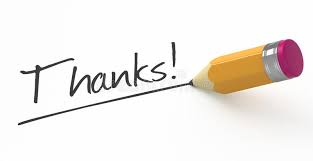</p>


**If you find the work beneficial, upvote it! I expect your feedbacks on the project. Thanks, Emre**